In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [5]:
data = pd.read_csv("synthetic_slip_dataset.csv")
data.head

<bound method NDFrame.head of       vehicle_speed  wheel_angular_velocity  wheel_torque  normal_force  \
0          1.200622               53.549475    375.194305   2207.166450   
1          1.916561              145.540812    180.181876   2736.170225   
2         29.279182              139.445448     21.433533   2939.446432   
3         29.081759              104.401250    297.362223   3401.003584   
4         22.279528               69.233288    291.330147   2440.730888   
...             ...                     ...           ...           ...   
4995      35.345397              128.594570    105.119779   2854.700459   
4996      26.903250                3.997080     54.371727   3478.167436   
4997      31.024466              146.813280    209.472277   2165.456825   
4998      37.458252               41.292579    404.043920   3089.698965   
4999      35.306713               56.218278    358.039996   3980.939059   

      tire_temp  steering_angle  slip_ratio  
0     20.217673        

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data[["vehicle_speed", "wheel_angular_velocity", "wheel_torque", "normal_force", "tire_temp", "steering_angle"]]
y = data[["slip_ratio"]]

In [8]:
X.head()

,vehicle_speed,wheel_angular_velocity,wheel_torque,normal_force,tire_temp,steering_angle
0,1.200622,53.549475,375.194305,2207.166450,20.217673,0.123028
1,1.916561,145.540812,180.181876,2736.170225,70.308427,0.488945
2,29.279182,139.445448,21.433533,2939.446432,86.253906,-0.066488
3,29.081759,104.401250,297.362223,3401.003584,34.652859,0.001358
4,22.279528,69.233288,291.330147,2440.730888,35.449042,-0.036380


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [10]:
train_data = X_train.join(y_train)
train_data.head()

,vehicle_speed,wheel_angular_velocity,wheel_torque,normal_force,tire_temp,steering_angle,slip_ratio
4740,27.603564,66.582176,411.878502,2449.141187,58.187799,-0.181352,-0.285846
1452,9.017430,58.685724,477.462193,2478.606087,58.860708,0.274077,0.984113
2846,33.320728,96.003210,105.311613,3425.906998,28.249619,0.094516,-0.142965
4670,1.527667,155.519387,307.162691,3562.083562,49.407269,-0.396842,1.000000
168,33.059168,75.377578,321.612007,3016.601693,55.443707,-0.098584,-0.306811


array([[<Axes: title={'center': 'vehicle_speed'}>,
        <Axes: title={'center': 'wheel_angular_velocity'}>,
        <Axes: title={'center': 'wheel_torque'}>],
       [<Axes: title={'center': 'normal_force'}>,
        <Axes: title={'center': 'tire_temp'}>,
        <Axes: title={'center': 'steering_angle'}>],
       [<Axes: title={'center': 'slip_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

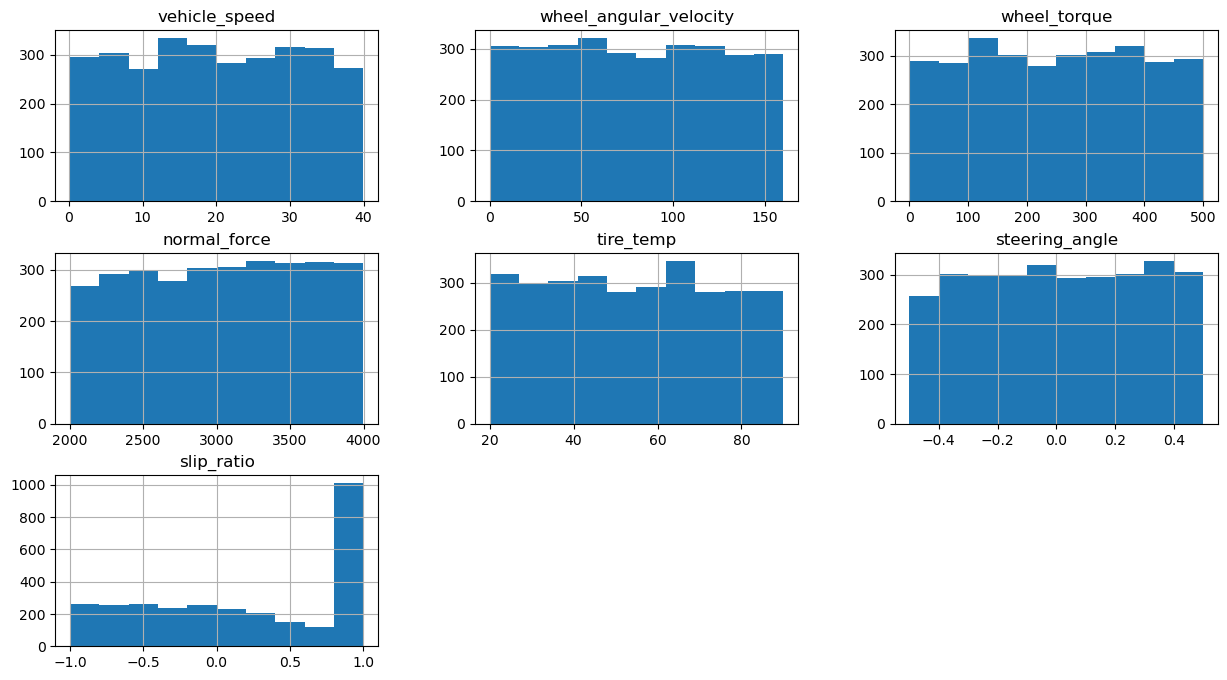

In [11]:
train_data.hist(figsize = (15,8))

In [ ]:
import tensorflow as tf
import numpy as np

model = models.Sequential([
    layers.Dense(24, activation='sigmoid', input_shape=(10,)),
    layers.Dense(12, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Tiny dataset
x_train = np.random.rand(20, 10)
y_train = np.random.randint(0, 2, 20)

# Train with very small batch
model.fit(x_train, y_train, epochs=3, batch_size=4)

/Users/aayanmapara/Projects/SDM_DAQ/models/env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-16 19:23:14.651467: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-10-16 19:23:14.651539: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-16 19:23:14.651562: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-10-16 19:23:14.651602: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-16 19:23:14.651632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_fact

Epoch 1/3


In [ ]:
model.fit(X_train, y_train, epochs=1, batch_size=8)